# 데이터 이해

체크리스트
- 각 피처의 의미 파악
- 타깃 변수(Churn) 분포 확인
- 결측치 / 이상치 존재 여부

이 과정에서 데이터의 성격/변수의 의미/타겟 변수(Churn)의 분포를 정확히 파악한다.

## 데이터의 크기 & 구조 확인

In [23]:
import pandas as pd

df = pd.read_csv(".\통신사 데이터셋\data\cust_data_v1.csv")
df.head()

#데이터 불러오기 그리고 데이터가 정상적으로 로드되는지 확인 후 행(row) 하나가 고객 1명인지.

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,NaN,0.0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,NaN,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2,Yes,No,DSL,Yes,...,NaN,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45,No,No phone service,DSL,Yes,...,NaN,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2,Yes,No,Fiber optic,No,...,NaN,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
df.shape

(7043, 21)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7034 non-null   object 
 2   SeniorCitizen     7042 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7041 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7040 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  3580 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7042 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


본 데이터셋은 7043명의 고객과 21개의 변수로 구성되어있다.

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 타깃 변수(Churn)분포 확인

요금 관련(비교 대상1)
- MonthlyCharges
- TotalCharges

경험 누적 관련(비교 대상2)
- Tenure
- OnlineSecurity / TechSupport / DeviceProtection
- Streaming TV / StreamingMovies

계약·관계 요인
- Contract
- PaymentMethod
- PaperlessBilling

타깃
- Churn

In [27]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [28]:
df['Churn'].value_counts(normalize=True) * 100

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64

전체 고객 중 약 26.54%가 이탈 고객으로 나타났으며 이는 이탈분석을 위한 충분한 표본을 제공한다. 
4명 중 1명이 떠난다.

In [29]:
# 결측치 확인
df.isnull().sum()

# DeviceProtection: 3463개 결측
# internetService = no 인 고객에는 의미없는 변수

# 본 데이터셋의 일부 결측치는 서비스 미이용에 따른 구조적 결측으로 판단되며, 이는 전처리 단계에서 적절히 반영한다.

customerID             0
gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
dtype: int64

In [30]:
# 수치형 변수 기초 통계 확인
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7042.000000,7043.000000,7042.000000
mean,0.162170,32.371149,64.763256
std,0.368633,24.559481,30.091898
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


tenure (가입 기간)
- 평균: 32개월
- 최소: 0개월
- 최대: 72개월
단기 ~ 장기 고객이 고르게 분포
→ “경험의 누적” 분석에 최적
----------------------
MonthlyCharges (월 요금)
- 평균: 약 65
- 표준편차: 30 (꽤 큼)
- 범위: 18 ~ 118
고객 간 요금 편차가 큼
→ “요금 vs 이탈” 비교 가치 충분
----------------------
SeniorCitizen
- 평균 0.16 → 약 16%
특정 소수 집단 존재
→ 고령 고객 이탈 같은 서브 인사이트 가능

전체 고객 중 약 26.5%가 이탈 고객으로 나타났으며, 이는 통신사 고객 이탈이 개별 사례가 아닌 구조적 문제임을 시사한다. 해당 비율은 이탈 원인 분석 및 고객 세분화를 수행하기에 충분한 표본을 제공한다.

# 데이터 전처리

체크리스트
- 결측치 처리
- 범주형 변수 인코딩(설명 포함)
- 불필요한 컬럼 제거

이 과정에서 데이터를 분석 목적에 맞게 해석 가능한 형태로 정리한다.

##  Customer ID 제거
이유: 식별자일 뿐 이탈 설명력 없음

In [31]:
df = df.drop(columns=['customerID'])

## Churn변수 이진화
이유: 평균, 그룹 비교 시 해석 쉬움

In [32]:
df['Churn_binary'] = df['Churn'].map({'No': 0, 'Yes': 1})

## 결측치 처리

In [33]:
df.isnull().sum()

gender                 9
SeniorCitizen          1
Partner                0
Dependents             2
tenure                 0
PhoneService           3
MultipleLines          0
InternetService        0
OnlineSecurity         0
OnlineBackup           0
DeviceProtection    3463
TechSupport            0
StreamingTV            0
StreamingMovies        0
Contract               1
PaperlessBilling       0
PaymentMethod          1
MonthlyCharges         1
TotalCharges           0
Churn                  0
Churn_binary           0
dtype: int64

In [34]:
df = df.dropna(subset=[
    'gender', 'SeniorCitizen', 'PhoneService',
    'Contract', 'PaymentMethod', 'MonthlyCharges'
])

결측 비율이 매우 낮아 분석 왜곡 가능성이 제한적이므로 해당 행을 제거하였다.

In [35]:
# DeviceProtection 결측치 (구조적 결측)
df['DeviceProtection'] = df['DeviceProtection'].fillna('No_Service')

DeviceProtection 변수의 결측치는 서비스 미이용에 따른 구조적 결측으로 판단하여, 별도 범주(No_Service)로 처리하였다.

## TotalCharges 타입 점검

In [36]:
df['TotalCharges'].dtype

dtype('O')

In [37]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [38]:
df['TotalCharges'].dtype

dtype('float64')

In [39]:
df['TotalCharges'].isnull().sum()

11

In [40]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

가입 초기 고객의 경우 누적 요금이 발생하지 않아 0으로 처리하였다.

## 전처리 후 데이터 상태 점검

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7028 entries, 1 to 7041
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7028 non-null   object 
 1   SeniorCitizen     7028 non-null   float64
 2   Partner           7028 non-null   object 
 3   Dependents        7027 non-null   object 
 4   tenure            7028 non-null   int64  
 5   PhoneService      7028 non-null   object 
 6   MultipleLines     7028 non-null   object 
 7   InternetService   7028 non-null   object 
 8   OnlineSecurity    7028 non-null   object 
 9   OnlineBackup      7028 non-null   object 
 10  DeviceProtection  7028 non-null   object 
 11  TechSupport       7028 non-null   object 
 12  StreamingTV       7028 non-null   object 
 13  StreamingMovies   7028 non-null   object 
 14  Contract          7028 non-null   object 
 15  PaperlessBilling  7028 non-null   object 
 16  PaymentMethod     7028 non-null   object 
 17  

In [42]:
df.isnull().sum

<bound method DataFrame.sum of       gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1      False          False    False       False   False         False   
2      False          False    False       False   False         False   
3      False          False    False       False   False         False   
4      False          False    False       False   False         False   
5      False          False    False       False   False         False   
...      ...            ...      ...         ...     ...           ...   
7037   False          False    False       False   False         False   
7038   False          False    False       False   False         False   
7039   False          False    False       False   False         False   
7040   False          False    False       False   False         False   
7041   False          False    False       False   False         False   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
1    

## 점검 결과
- 총 행 수: 7,028
- 컬럼 수: 21
- 메모리/구조 이상 없음

타입 확인
- MonthlyCharges → float64
- TotalCharges → float64 
- tenure → int64 
- Churn_binary → int64 

# 탐색적 데이터 분석(EDA)

체크리스트
- 평균 + 분산
- 단일 변수 X → 조합 분석 O
- 그래프 + 해석 문장

이 과정에서 데이터로 우리의 가설을 검증할 수 있는 질문과 증거를 설계한다.

## EDA 설계 표 (핵심 산출물)

| 분석 질문                       | 사용 피처                              | 분석 방법    | 시각화          | 기대 인사이트                  |
| --------------------------- | ---------------------------------- | -------- | ------------ | ------------------------ |
| Q1. 이탈은 요금 수준 때문인가?         | MonthlyCharges, Churn              | 그룹 평균 비교 | 박스플롯 / 히스토그램 | 요금이 높아도 이탈하지 않는 고객 존재 여부 |
| Q2. 가입 기간이 길수록 이탈이 줄어드는가?   | tenure, Churn                      | 평균·분포 비교 | 박스플롯         | 단기 고객 vs 장기 고객 이탈 차이     |
| Q3. 서비스 이용 경험은 이탈에 영향을 주는가? | TechSupport, OnlineSecurity, Churn | 이탈률 비교   | 막대그래프        | 지원 서비스 미이용 고객의 이탈 집중 여부  |
| Q4. 요금보다 ‘경험 누적’이 더 중요한가?   | tenure × MonthlyCharges × Churn    | 교차 비교    | 그룹 막대그래프     | 고요금·장기 고객의 이탈률           |
| Q5. 반드시 유지해야 할 고객은 누구인가?    | TotalCharges, tenure, Churn        | 고객 가치 구분 | 산점도          | 고가치 고객 중 이탈 고객 식별        |


Q1. 이탈은 요금 때문인가?

- 단순 평균만 보지 않기
- 이탈 고객과 비이탈 고객의 분포 겹침 여부가 중요

요금이 높다는 이유만으로 고객이 이탈하지는 않는다.

Q2. 가입 기간(tenure)은 왜 중요한가?

- tenure = 경험의 누적 시간
- 이탈을 “사건”이 아니라 “과정”으로 볼 수 있음

이탈은 초기에 집중된다.

Q3. 서비스 이용 경험

- TechSupport, OnlineSecurity는 불만 해소 장치
- ‘No’인 고객의 이탈률이 핵심

“문제는 요금이 아니라, 해결되지 않은 불편이다.

Q4. 요금 × 경험 누적 (핵심 분석)

- 고요금 + 장기 고객이 안 떠난다면?
- 저요금 + 단기 고객이 많이 떠난다면?

요금보다 관계가 중요하다.

Q5. 반드시 유지해야 할 고객

- 이탈 고객 중에서도:
- TotalCharges 높음
- tenure 길음

모든 이탈이 같은 손실은 아니다.

### Q1. 이탈은 요금 수준 때문인가?
월 요금이 높아서 고객이 이탈한다고 단정할 수 있는가?

In [43]:
df.groupby('Churn')['MonthlyCharges'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5162.0,61.278071,31.088613,18.25,25.10,64.45,88.4000,118.75
Yes,1866.0,74.439068,24.685130,18.85,56.15,79.65,94.2375,118.35


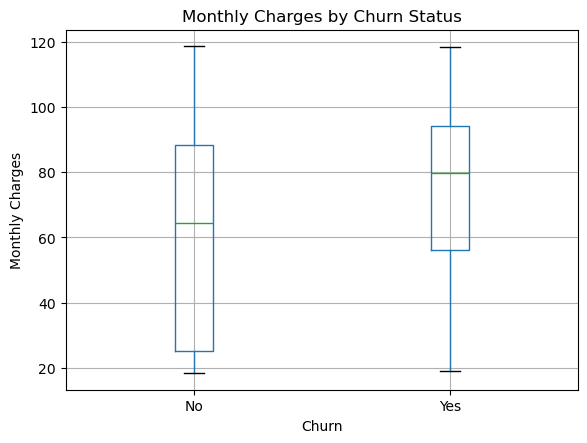

In [70]:
import matplotlib.pyplot as plt

df.boxplot(column='MonthlyCharges', by='Churn')
plt.title('Monthly Charges by Churn Status')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

박스플롯 분석 결과,이탈 고객의 월 요금 중앙값이 비이탈 고객보다 높게 형성되어 있으나,
두 집단의 분포 폭이 크게 겹쳐 단일 요금 기준으로 고객 이탈 여부를 구분하기는 어렵다.

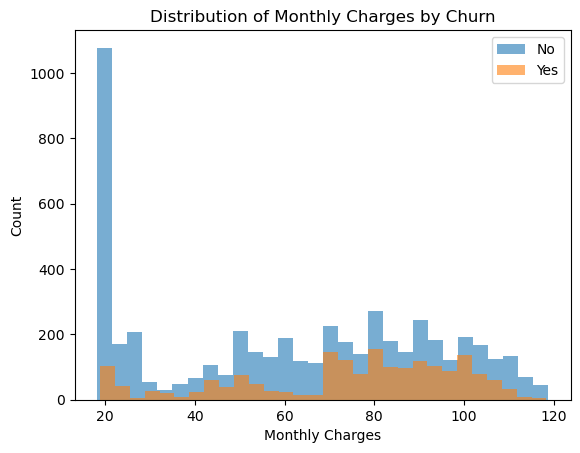

In [45]:
plt.hist(df[df['Churn']=='No']['MonthlyCharges'], bins=30, alpha=0.6, label='No')
plt.hist(df[df['Churn']=='Yes']['MonthlyCharges'], bins=30, alpha=0.6, label='Yes')
plt.xlabel('Monthly Charges')
plt.ylabel('Count')
plt.title('Distribution of Monthly Charges by Churn')
plt.legend()
plt.show()

히스토그램을 통해 분포를 확인한 결과, 저요금 구간에서는 비이탈 고객의 비중이 상대적으로 높았으나, 중·고요금 구간에서는 이탈 고객과 비이탈 고객이 혼재되어 분포하였다. 특정 요금대에서 이탈이 급격히 증가하는 임계점은 관찰되지 않았다.

### Q2. 가입 기간(tenure)은 이탈과 어떤 관계가 있는가?
고객 이탈은 언제 발생하는가? 가입 초기에 집중되는가, 아니면 기간과 무관한가?

In [46]:
df.groupby('Churn')['tenure'].describe()

,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5162.0,37.583882,24.102636,0.0,15.0,38.0,61.0,72.0
Yes,1866.0,17.994105,19.542035,1.0,2.0,10.0,29.0,72.0


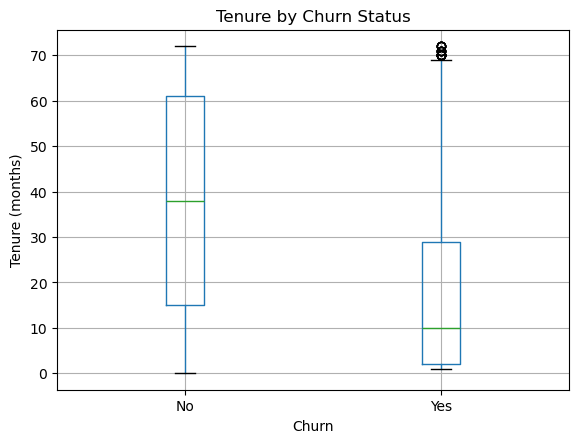

In [47]:
import matplotlib.pyplot as plt

df.boxplot(column='tenure', by='Churn')
plt.title('Tenure by Churn Status')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()

이탈 고객의 가입 기간 분포는 비이탈 고객 대비 전반적으로 짧은 구간에 집중되어 있으며,
특히 중앙값 기준으로 두 집단 간 차이가 매우 크게 나타난다.
비이탈 고객의 경우 가입 기간이 장기 구간까지 넓게 분포하는 반면,
이탈 고객은 상대적으로 초기 구간에 밀집된 형태를 보인다.

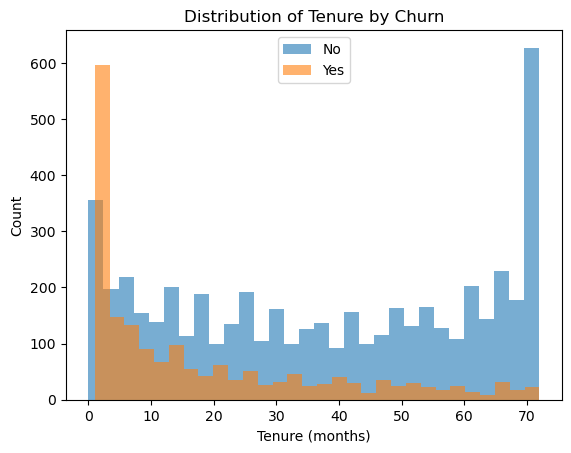

In [48]:
plt.hist(df[df['Churn']=='No']['tenure'], bins=30, alpha=0.6, label='No')
plt.hist(df[df['Churn']=='Yes']['tenure'], bins=30, alpha=0.6, label='Yes')
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.title('Distribution of Tenure by Churn')
plt.legend()
plt.show()

이탈 고객은 가입 초기(대략 0~12개월) 구간에 집중적으로 분포하며,
가입 기간이 길어질수록 이탈 고객의 비중은 급격히 감소하는 경향을 보인다.
반면 비이탈 고객은 전 가입 기간 구간에 걸쳐 비교적 고르게 분포하며,
장기 이용 고객에서 높은 비중을 차지한다

In [49]:
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']

df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

churn_rate_by_tenure = df.groupby('tenure_group')['Churn_binary'].mean() * 100
churn_rate_by_tenure

C:\Users\Admin\AppData\Local\Temp\ipykernel_17272\134457206.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_tenure = df.groupby('tenure_group')['Churn_binary'].mean() * 100


tenure_group
0-12     47.739852
13-24    28.669276
25-36    21.660650
37-48    19.053876
49-60    14.423077
61-72     6.628653
Name: Churn_binary, dtype: float64

### Q3. 서비스 이용 경험은 이탈에 어떤 영향을 미치는가?
요금이 아니라, 문제를 해결해주는 서비스 경험의 부재가 이탈을 유발하는가?

In [60]:
#TechSupport 기준
df.groupby('TechSupport')['Churn_binary'].mean() * 100

TechSupport
No                     41.620998
No internet service     7.424442
Yes                    15.203531
Name: Churn_binary, dtype: float64

In [ ]:
#OnlineSecurity 기준
df.groupby('OnlineSecurity')['Churn_binary'].mean() * 100

OnlineSecurity
No                     41.781214
No internet service     7.424442
Yes                    14.597815
Name: Churn_binary, dtype: float64

In [61]:
#OnlineBackup(보조)
df.groupby('OnlineBackup')['Churn_binary'].mean() * 100

OnlineBackup
No                     39.928641
No internet service     7.424442
Yes                    21.543541
Name: Churn_binary, dtype: float64

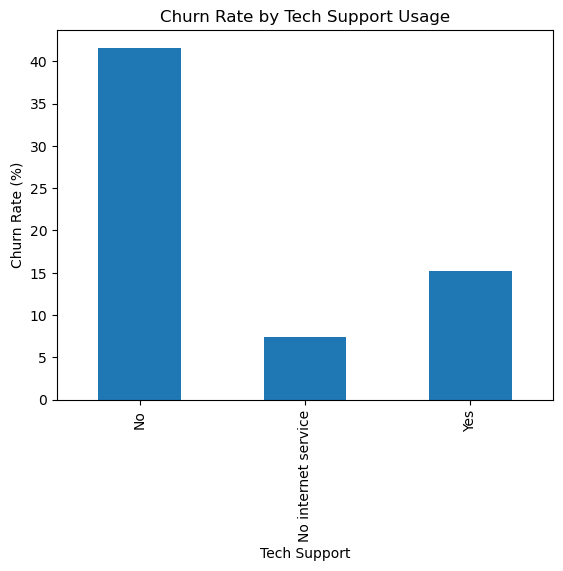

In [62]:
#TechSupport 이탈률
import matplotlib.pyplot as plt

churn_ts = df.groupby('TechSupport')['Churn_binary'].mean() * 100
churn_ts.plot(kind='bar')
plt.title('Churn Rate by Tech Support Usage')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Tech Support')
plt.show()

그래프에서 TechSupport를 이용하지 않는 고객(No)의 막대가 가장 높게 나타나며, 이탈률이 약 40%를 초과함을 확인할 수 있다.
반면, TechSupport를 이용하는 고객(Yes)의 막대는 상대적으로 낮은 수준에 위치해 있으며,
기술 지원 서비스를 이용할 경우 이탈률이 크게 감소하는 경향이 시각적으로 명확하게 드러난다.

또한 인터넷 서비스를 이용하지 않는 고객(No internet service)의 막대는 가장 낮은 위치에 있어,
인터넷 기반 서비스 이용 자체가 없는 고객군에서는 이탈률이 상대적으로 낮게 형성됨을 보여준다.
전반적으로 이 시각화는 기술 지원 서비스 이용 여부에 따라 이탈률이 뚜렷하게 구분되는 패턴을 직관적으로 나타낸다.

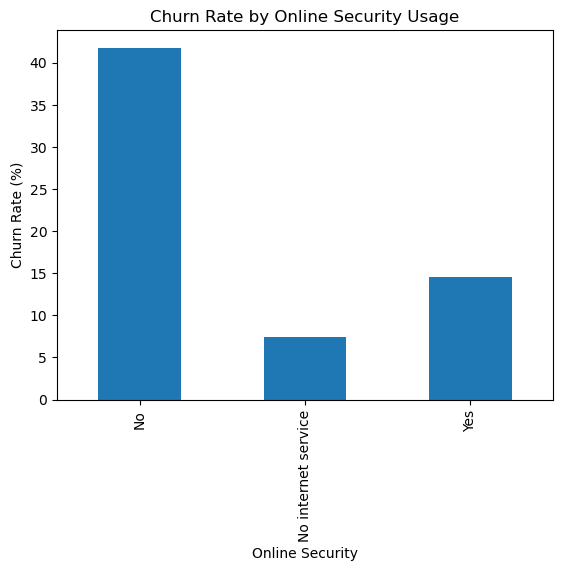

In [63]:
#OnlineSecurity 이탈률
churn_sec = df.groupby('OnlineSecurity')['Churn_binary'].mean() * 100
churn_sec.plot(kind='bar')
plt.title('Churn Rate by Online Security Usage')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Online Security')
plt.show()

온라인 보안(OnlineSecurity) 이용 여부에 따른 이탈률을 나타낸 이 그래프 역시
TechSupport 시각화와 유사한 패턴을 보인다.
OnlineSecurity를 이용하지 않는 고객(No)의 이탈률 막대가 가장 높게 나타나며,
이용 고객(Yes)에 비해 현저히 높은 수준임을 시각적으로 확인할 수 있다.

반면, OnlineSecurity를 이용하는 고객(Yes)의 막대는 상대적으로 낮은 위치에 분포하며,
보안 서비스를 이용하는 고객일수록 이탈률이 낮아지는 경향이 뚜렷하게 드러난다.
인터넷 서비스를 이용하지 않는 고객군은 이탈률이 가장 낮게 나타나며,
이는 해당 그래프에서도 일관되게 확인되는 특징이다.

이 시각화는 온라인 보안 서비스 이용 여부가 고객 이탈률을 명확하게 구분짓는 요인임을 한눈에 보여준다.

In [64]:
#TechSupport x OnlineSecurity 조합
df.groupby(['TechSupport', 'OnlineSecurity'])['Churn_binary'].mean() * 100

TechSupport          OnlineSecurity     
No                   No                     48.941176
                     Yes                    21.264995
No internet service  No internet service     7.424442
Yes                  No                     22.399151
                     Yes                     9.024613
Name: Churn_binary, dtype: float64

### Q4. 반드시 유지해야 할 고객은 누구인가?
모든 이탈이 같은 손실인가? 떠나면 손실이 큰 고객은 누구인가?

In [65]:
#이탈 고객 vs 비이탈 고객의 ‘가치’ 비교
df.groupby('Churn')[['TotalCharges', 'tenure', 'MonthlyCharges']].describe()

TotalCharges                                                      \
             count         mean          std    min      25%       50%   
Churn                                                                    
No          5162.0  2550.871087  2329.470602   0.00  573.075  1680.925   
Yes         1866.0  1533.128912  1891.962869  18.85  134.550   702.200   

                         tenure             ...             MonthlyCharges  \
           75%      max   count       mean  ...   75%   max          count   
Churn                                       ...                              
No     4262.85  8672.45  5162.0  37.583882  ...  61.0  72.0         5162.0   
Yes    2334.30  8684.80  1866.0  17.994105  ...  29.0  72.0         1866.0   

                                                                   
            mean        std    min    25%    50%      75%     max  
Churn                                                              
No     61.278071  31.088613  18.25  25.10  64.45  88.4000  118.75  
Yes    74.439068  24.685130  18.85  56.15  79.65  94.2375  118.35  

[2 rows x 24 columns]

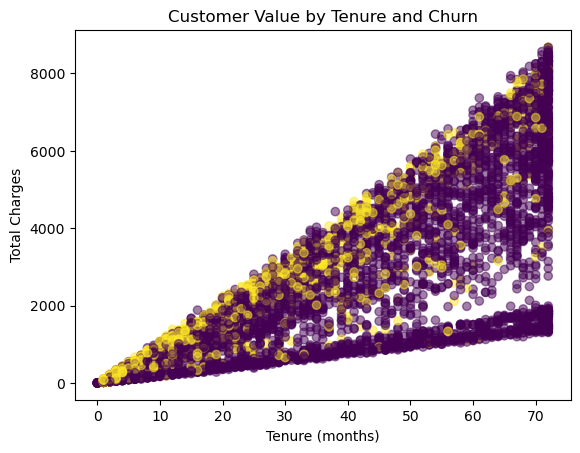

In [67]:
# TotalCharges × tenure (색상: 이탈 여부)
import matplotlib.pyplot as plt

plt.scatter(
    df['tenure'], 
    df['TotalCharges'], 
    c=df['Churn_binary'], 
    alpha=0.5
)
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges')
plt.title('Customer Value by Tenure and Churn')
plt.show()

가입 기간과 누적 요금을 함께 고려한 산점도 분석 결과, 고객 가치 분포는 가입 기간이 증가함에 따라 누적 요금이 증가하는
우상향 구조를 명확히 보인다. 대부분의 이탈 고객은 가입 기간이 짧고 누적 요금이 낮은 좌하단 영역에 집중되어 있으나,
일부 이탈 고객은 장기 이용 및 높은 누적 요금 구간에도 존재함을 확인할 수 있다.
이는 이탈 고객 전체의 평균적인 가치가 낮더라도, 소수의 이탈이 매우 큰 매출 손실로 이어질 수 있음을 시사한다.


In [68]:
tc_75 = df['TotalCharges'].quantile(0.75)
tenure_75 = df['tenure'].quantile(0.75)

df['HighValueCustomer'] = (
    (df['TotalCharges'] >= tc_75) & 
    (df['tenure'] >= tenure_75)
)

df.groupby('HighValueCustomer')['Churn_binary'].mean() * 100

HighValueCustomer
False    30.275549
True     10.046368
Name: Churn_binary, dtype: float64

# 분석 내용 요약
- 고객 이탈은 요금이라는 단일 요인으로 설명되지 않는다.
- 이탈은 가입 초기 단계에 집중된다.
- 서비스 이용 경험의 부재는 이탈을 급격히 증가시킨다.
- 모든 이탈이 동일한 손실을 의미하지 않는다.

통신사 고객 이탈은 가격 문제가 아니라,
초기 단계에서의 경험 관리 실패가 누적된 결과로 발생한다.
따라서 이탈 관리 전략은 가격 중심 접근에서 벗어나
경험 및 고객 가치 중심 전략으로 전환될 필요가 있다.